# Importing Library

In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import datetime

%matplotlib inline

# Importing data

In [2]:
finaldata = pd.read_csv('cleaned_data.csv')

In [41]:
finaldata.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'Month-Year', 'Confirmed Daily',
       'Deaths Daily', 'Recovered Daily'],
      dtype='object')

In [3]:
finaldata.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,0,Afghanistan,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0.0,Jan-20,0,0,0.0
1,271,Afghanistan,Afghanistan,33.93911,67.709953,23-01-2020,0,0,0.0,Jan-20,0,0,0.0
2,542,Afghanistan,Afghanistan,33.93911,67.709953,24-01-2020,0,0,0.0,Jan-20,0,0,0.0
3,813,Afghanistan,Afghanistan,33.93911,67.709953,25-01-2020,0,0,0.0,Jan-20,0,0,0.0
4,1084,Afghanistan,Afghanistan,33.93911,67.709953,26-01-2020,0,0,0.0,Jan-20,0,0,0.0


# grouping data according to Country basis

In [9]:
df = finaldata.groupby('Country/Region').agg({'Confirmed Daily' : 'sum', 'Deaths Daily' : 'sum', 'Recovered Daily' : 'sum'}).sort_values(by = 'Country/Region',ascending = True)
df.head(50)

,Confirmed Daily,Deaths Daily,Recovered Daily
Country/Region,,,
Afghanistan,51526,2191,41727.0
Albania,58316,1181,33634.0
Algeria,99897,2762,67509.0
Andorra,8117,84,7464.0
Angola,17568,408,11453.0
Antigua and Barbuda,160,5,148.0
Argentina,1629594,43319,1426676.0
Armenia,159738,2828,143355.0
Australia,28550,910,25831.0


# top 10 countries having most confirmed daily cases

In [36]:
df2 = finaldata.groupby('Country/Region').agg({'Confirmed Daily' : 'sum'}).sort_values(by = 'Confirmed Daily',ascending = False)
df2.head(10)

,Confirmed Daily
Country/Region,
US,20128693
India,10286709
Brazil,7700578
Russia,3153960
France,2773210
United Kingdom,2549696
Turkey,2220855
Italy,2129524
Spain,1938671


 # top 10 countries having most Recovered daily cases

In [38]:
df3 = finaldata.groupby('Country/Region').agg({'Recovered Daily' : 'sum'}).sort_values(by = 'Recovered Daily',ascending = False)
df3.head(10)

,Recovered Daily
Country/Region,
India,9883461.0
Brazil,6855372.0
US,6303715.0
Russia,2553467.0
Turkey,2114760.0
Colombia,1586699.0
Italy,1480872.0
Argentina,1426676.0
Germany,1388744.0


 # top 10 countries having most Death daily cases

In [40]:
df4 = finaldata.groupby('Country/Region').agg({'Deaths Daily':'sum'}).sort_values(by = 'Deaths Daily', ascending = False)
df4.head(10)

,Deaths Daily
Country/Region,
US,347788
Brazil,195411
India,148995
Mexico,126507
Italy,74652
United Kingdom,74239
France,65292
Russia,56798
Iran,55337


In [10]:
df1 = df.sort_values(by= 'Confirmed Daily', ascending = False).head(10)
df1

,Confirmed Daily,Deaths Daily,Recovered Daily
Country/Region,,,
US,20128693,347788,6303715.0
India,10286709,148995,9883461.0
Brazil,7700578,195411,6855372.0
Russia,3153960,56798,2553467.0
France,2773210,65292,206070.0
United Kingdom,2549696,74239,6046.0
Turkey,2220855,21093,2114760.0
Italy,2129524,74652,1480872.0
Spain,1938671,52757,150376.0


# Barplot of Country vs Confirmed Daily Cases

C:\Users\aman\AppData\Local\Temp\ipykernel_2032\876975593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Country/Region', y = 'Confirmed Daily',data = df1,palette = 'bright')


Text(0.5, 1.0, 'Country/Region vs Confirmed Daily')

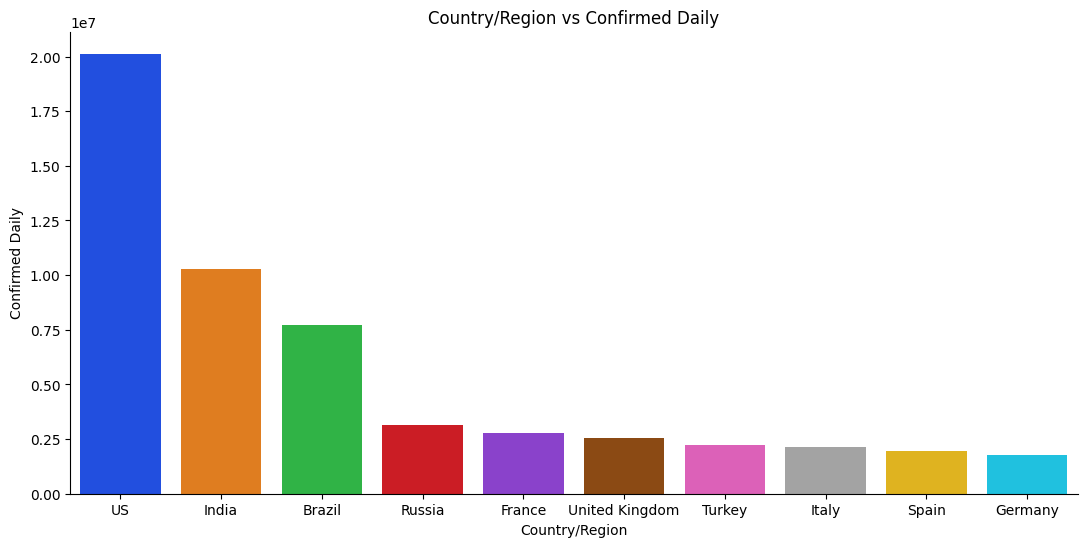

In [11]:
plt.figure(figsize = (13,6))
df1 = df.sort_values(by= 'Confirmed Daily', ascending = False).head(10)
barplot = sns.barplot(x = 'Country/Region', y = 'Confirmed Daily',data = df1,palette = 'bright')
sns.despine()
plt.title('Country/Region vs Confirmed Daily')

# Barplot of Country vs Deaths Daily Cases

C:\Users\aman\AppData\Local\Temp\ipykernel_2032\1380420832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Country/Region', y = 'Deaths Daily',data = df1,palette = 'pastel')


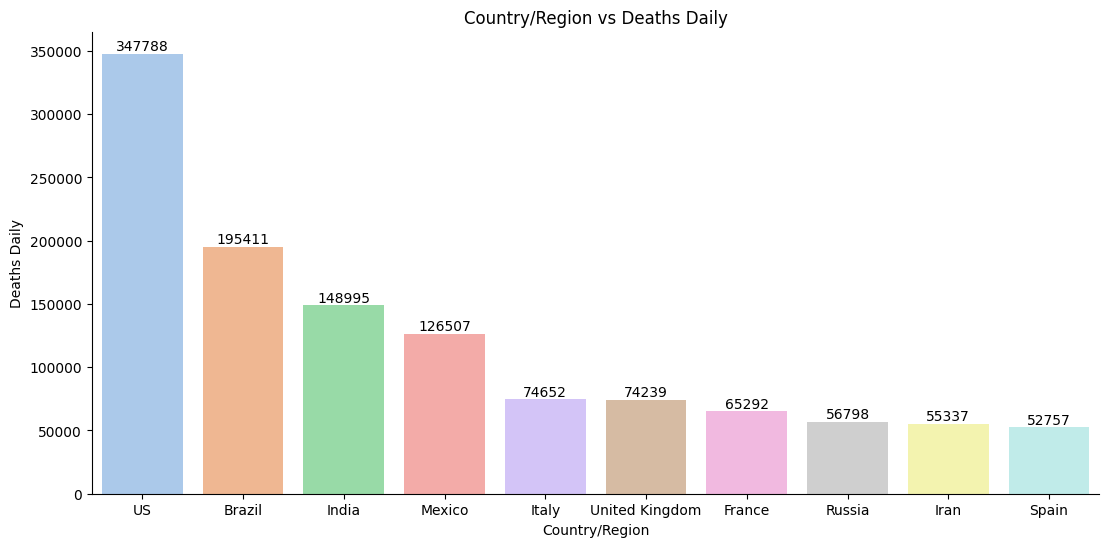

In [12]:
plt.figure(figsize = (13,6))
df1 = df.sort_values(by= 'Deaths Daily', ascending = False).head(10)
barplot = sns.barplot(x = 'Country/Region', y = 'Deaths Daily',data = df1,palette = 'pastel')
sns.despine()
plt.title('Country/Region vs Deaths Daily')
for i in barplot.containers:
    barplot.bar_label(i,)

# Barplot of Country vs Recovered  Daily Cases

C:\Users\aman\AppData\Local\Temp\ipykernel_2032\2148652344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Country/Region', y = 'Recovered Daily',data = df1, palette = 'deep')


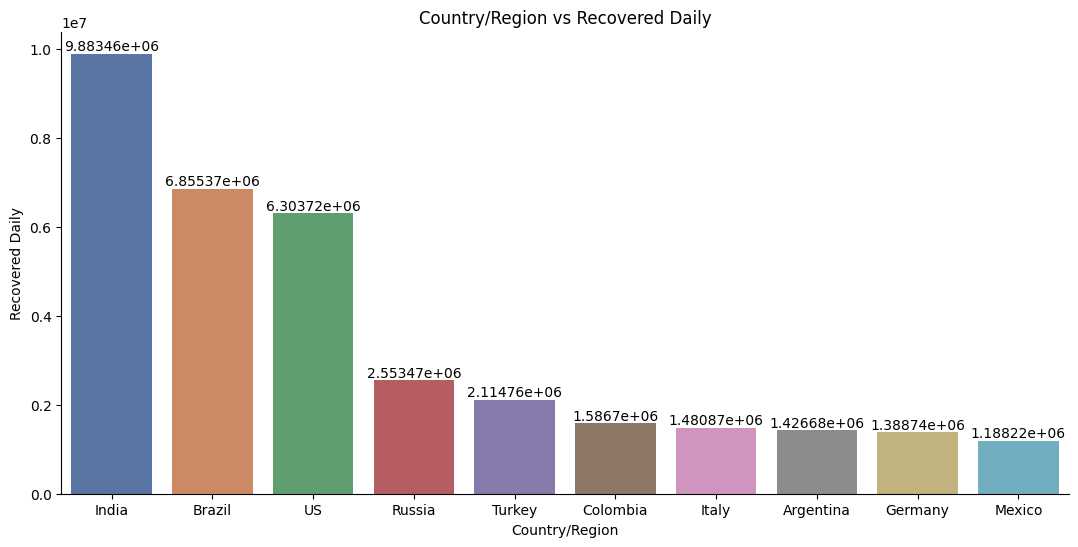

In [13]:
plt.figure(figsize = (13,6))
df1 = df.sort_values(by= 'Recovered Daily', ascending = False).head(10)
barplot = sns.barplot(x = 'Country/Region', y = 'Recovered Daily',data = df1, palette = 'deep')
sns.despine()
plt.title('Country/Region vs Recovered Daily')
for i in barplot.containers:
    barplot.bar_label(i,)

# line plot of country vs Recovered vs Confirmed vs Deaths cases Daily

Text(0.5, 1.0, 'Country/Region vs Deaths Daily')

<Figure size 1000x600 with 0 Axes>

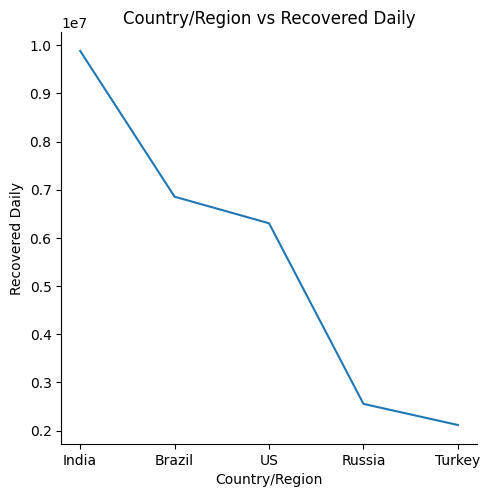

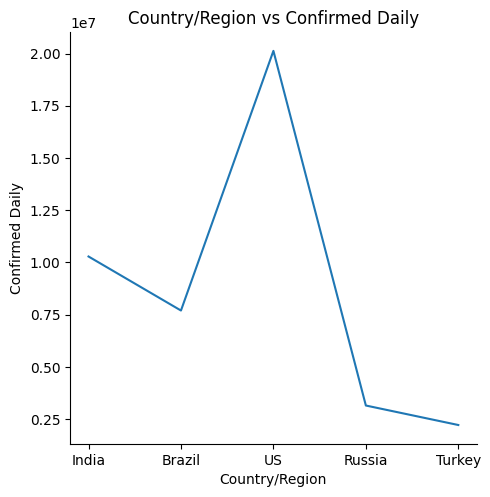

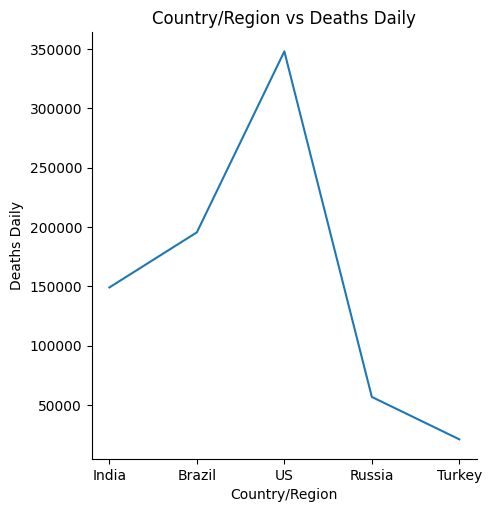

In [47]:
plt.figure(figsize = (10,6))
df1 = df.sort_values(by= 'Recovered Daily', ascending = False).head(5)
sns.relplot(x = 'Country/Region', y = 'Recovered Daily',data = df1, kind='line')
plt.title('Country/Region vs Recovered Daily')
sns.relplot(x = 'Country/Region', y = 'Confirmed Daily',data = df1, kind='line')
plt.title('Country/Region vs Confirmed Daily')
sns.relplot(x = 'Country/Region', y = 'Deaths Daily',data = df1, kind='line')
plt.title('Country/Region vs Deaths Daily')

# pie chart of country vs Recovered cases Daily

array([<Axes: ylabel='Recovered Daily'>], dtype=object)

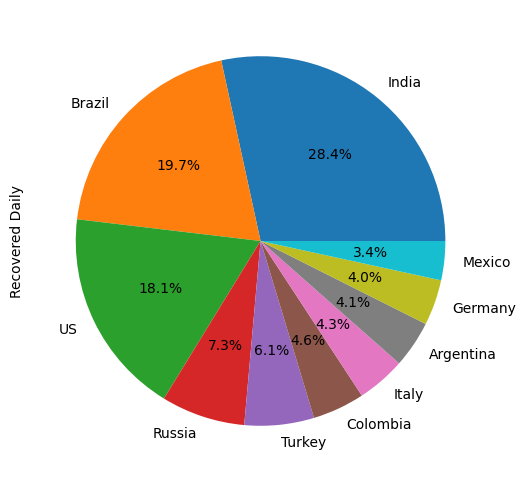

In [80]:
df3_1 = df3.head(10)
df3_1.plot.pie(autopct="%.1f%%",subplots=True , figsize = (11,6),legend = False)

# pie chart of country vs Deaths cases Daily

array([<Axes: ylabel='Deaths Daily'>], dtype=object)

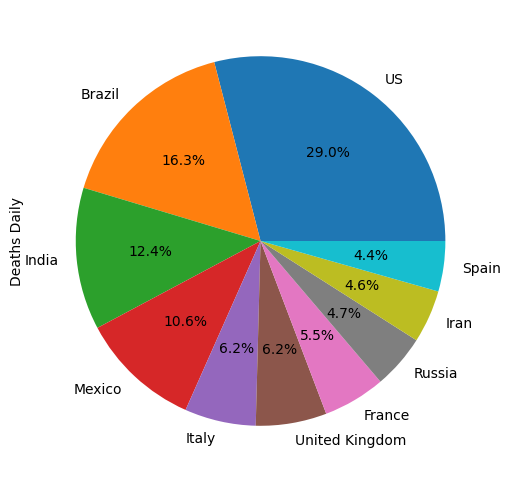

In [79]:
df4_1 = df4.head(10)
df4_1.plot.pie(autopct="%.1f%%",subplots=True , figsize = (11,6),legend = False)

# pie chart of country vs Confirmed cases Daily

array([<Axes: ylabel='Recovered Daily'>], dtype=object)

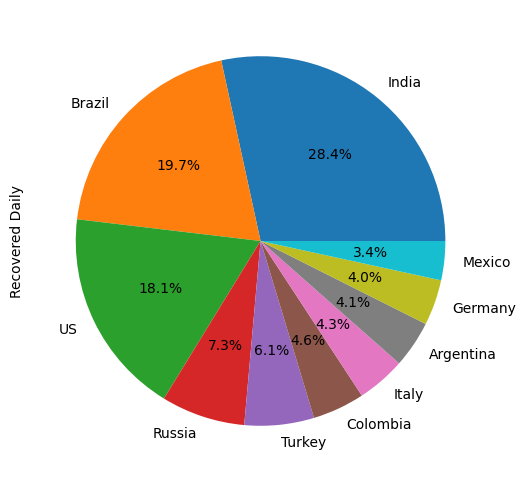

In [78]:
df2_1 = df2.head(10)
df2_1.plot.pie(autopct = "%.1f%%", subplots = True, figsize = (6,6), legend = False)